Clique aqui para ter acesso ao [mini-paper](https://www.overleaf.com/7983964188fsswxxqddwgh).



# Atividade: 

## Implementar os seguintes atributos em uma imagem:

- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia

Utilizar a base de imagens do trabalho anterior
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.

Implemente as seguintes transformações de intensidade:
* Alargamento de contraste: s=T(r)=(1/(1+((k/r)E^))).
* Negativo: s=L−1−r.
* Logarítmico:s=clog(1+r).
* Potência: s=(cr)^y.

a. Cada transformação deverá ser implementada utilizando pelo menos 4 configurações diferentes de parâmetros (exceto o negativo). 

b. Utilize as funções de transformação de intensidade como pré-processamento do trabalho anterior, reporte os resultados de classificação obtidos com as diferentes funções.

    i. Adicione os resultados no relatório do trabalho anterior;

    ii. Na seção de metodologia adicione e explique as funções de alargamento de contraste;

    iii. Na seção de resultados adicione tabelas com os resultados obtidos pelas funções e explique as diferenças obtidas em cada transformação.

    iv. Adicione imagens que justifiquem suas explicações.

- Entrega e apresentação: 10/01/2022

## DESCRITOR

In [1]:
import numpy as np
from scipy.stats import entropy, skew, kurtosis

In [2]:
def energy(x):
    return np.sum(np.power(x, 2))

In [3]:
def descritor_histograma(imagem):
    frequencias, _ = np.histogram(imagem, bins=256, density=True)

    media = np.mean(frequencias)

    var = np.var(frequencias)

    sk = skew(frequencias)

    kur = kurtosis(frequencias)

    ener = energy(frequencias)
    
    entr = entropy(frequencias)

    return [media,var,sk,kur,ener,entr]

## TRANSFORMAÇÕES DE INTENSIDADE

In [4]:
def alargamento_de_contraste(img, k, E):  
    image_array = np.array(img.copy(), dtype='float')

    image_array[img>0] = 1/(1 + (k/image_array[img>0])**E)
    
    return image_array

In [5]:
def negativo(img):
    return 255 - img.copy()

In [6]:
def transformacao_logaritmica(img, c):
    img_plus_1 = np.where(1+img.copy()< 1, 1, 1+img.copy())
    
    return np.array(c * np.log(img_plus_1), dtype='float64')

In [7]:
def transformacao_potencia(img, y, c=1):
    image_array = np.array(img, dtype='float')
        
    return c * np.power(image_array, y) 

In [8]:
values_E = [0.25, 2, 4, 6]
values_k = [100, 140, 180, 200]
values_c = [1, 3, 5, 7]
values_y = [0.35, 0.4, 0.45, 0.5]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_img(img, fig, i=1, rows=6, columns=4):
    fig.add_subplot(rows, columns, i)   
    plt.imshow(img, cmap='gray')

    return i

In [10]:
DATABASE_PATH = 'COVID-19_Radiography_Dataset'

c:\Users\euric\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


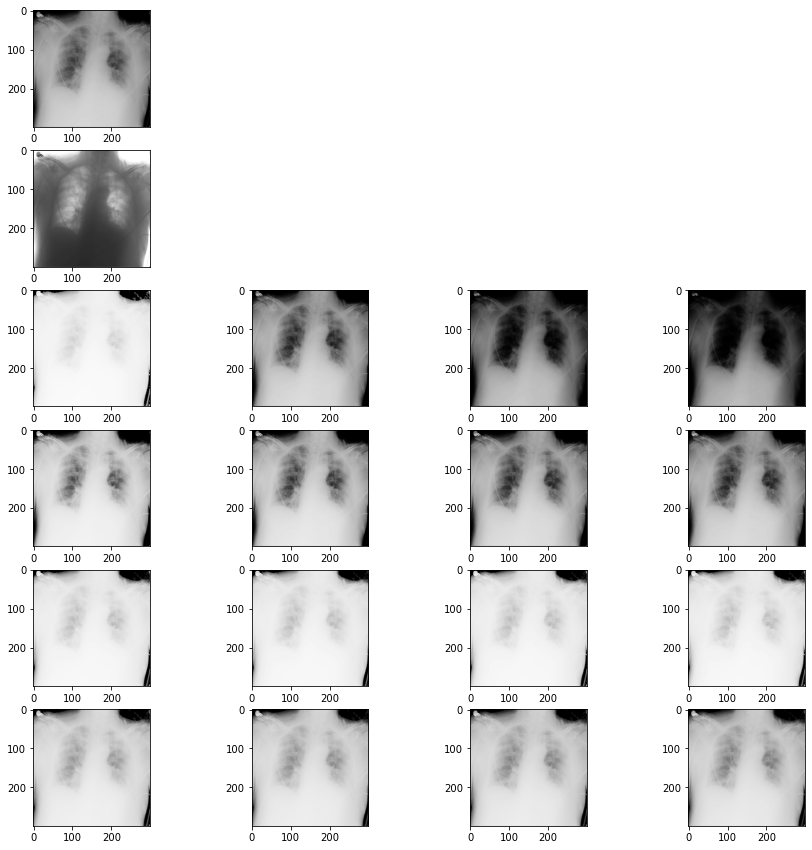

In [11]:
from skimage.io import imread

fig = plt.figure(figsize=(15, 15))
img = imread(DATABASE_PATH + '\COVID\images\COVID-1.png')

i = plot_img(img, fig)

i = plot_img(negativo(img), fig, i+4)

i+=3
for valor in values_E:
    i = plot_img(alargamento_de_contraste(img, 200, valor), fig, i+1)

for valor in values_k:
    i = plot_img(alargamento_de_contraste(img, valor, 2), fig, i+1)

for valor in values_c:
    i = plot_img(transformacao_logaritmica(img, valor), fig, i+1)   
    
for valor in values_y:
    i = plot_img(transformacao_potencia(img, valor), fig, i+1)
            
plt.show()

## CARREGANDO BASE

In [12]:
from glob import glob
import os

def load_images(DATABASE_PATH, classes, qtd_imagens=1300):
    database = []
    
    for classe in classes:
        IMAGES_PATH = classe + '/images'

        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, IMAGES_PATH, '*.png'))
    
        imagens = []
        for IMAGE_NAME in IMAGES_NAME[0:qtd_imagens]:
            imagens.append(imread(IMAGE_NAME, as_gray=True))
            
        database.append(imagens)
    
    return database

In [13]:
classes = ['Normal', 'COVID', 'Viral Pneumonia']

database = load_images(DATABASE_PATH, classes)

## CLASSIFICAÇÃO 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc

def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, shuffle=True, random_state=42)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test, pred)
    
    return acuracia

In [15]:
def matrix_descritors(database, funcao=None):
    x = []
    y = []
    for classe, images in enumerate(database):
        for image in images:
            if funcao:
                image = funcao(image)
            
            x.append(descritor_histograma(image))
            y.append(classe)

    return x,y 

In [16]:
def acuracia_media(database, nome, funcao=None, n_vezes=5):
    acuracias = []
    
    X, y = matrix_descritors(database, funcao)
    for _ in range(n_vezes):
        acuracias.append(classification(X, y))

    print(nome)
    print(f'Media {n_vezes} vezes: {np.mean(acuracias)}')
    print()

In [17]:
from functools import partial

acuracia_media(database, 'normal')

acuracia_media(database, 'negativo', negativo)

for valor in values_E:
    acuracia_media(database, f'alargamento de contraste k=200 E={valor}', partial(alargamento_de_contraste, k=200, E=valor))

for valor in values_k:
    acuracia_media(database, f'alargamento de contraste k={valor} E=2', partial(alargamento_de_contraste, k=valor, E=2))

for valor in values_c:
     acuracia_media(database, f'transformacao logaritmica c={valor}', partial(transformacao_logaritmica, c=valor))

for valor in values_y:
    acuracia_media(database, f'transformacao potencia y={valor}', partial(transformacao_potencia, y=valor)) 

normal
Media 5 vezes: 0.5217948717948717

negativo
Media 5 vezes: 0.5235897435897436

alargamento de contraste k=200 E=0.25
Media 5 vezes: 0.3466666666666667

alargamento de contraste k=200 E=2
Media 5 vezes: 0.4143589743589744

alargamento de contraste k=200 E=4
Media 5 vezes: 0.30307692307692313

alargamento de contraste k=200 E=6
Media 5 vezes: 0.3369230769230769

alargamento de contraste k=100 E=2
Media 5 vezes: 0.3587179487179487

alargamento de contraste k=140 E=2
Media 5 vezes: 0.4815384615384615

alargamento de contraste k=180 E=2
Media 5 vezes: 0.38410256410256405

alargamento de contraste k=200 E=2
Media 5 vezes: 0.34487179487179487

transformacao logaritmica c=1
Media 5 vezes: 0.5982051282051282

transformacao logaritmica c=3
Media 5 vezes: 0.6051282051282052

transformacao logaritmica c=5
Media 5 vezes: 0.6105128205128205

transformacao logaritmica c=7
Media 5 vezes: 0.6058974358974359

transformacao potencia y=0.35
Media 5 vezes: 0.6282051282051282

transformacao potencia 

## SALVAR CSV

In [18]:
import csv

def cria_csv(nome, valores):
    with open(nome, 'w') as f: 
        write = csv.writer(f) 

        write.writerow(['media', 'variancia', 'skewness', 'kurtosis', 'energy', 'entropy', 'doenca']) 
        write.writerows(valores) 

In [19]:
def uniao(database=database, funcao=None):
    x, y = matrix_descritors(database, funcao)

    for i, atributos in enumerate(x):
        atributos.append(y[i])

    return x

In [20]:
cria_csv('normal.csv', uniao())

cria_csv('negativo.csv', uniao(funcao=negativo))
    
for valor in values_E:
    cria_csv(f'alargamento de contraste k=200 E={valor}.csv', uniao(funcao=partial(alargamento_de_contraste, k=200, E=valor)))

for valor in values_k:
    cria_csv(f'alargamento de contraste k={valor} E=2.csv', uniao(funcao=partial(alargamento_de_contraste, k=valor, E=2)))

for valor in values_c:
    cria_csv(f'transformacao logaritmica c={valor}.csv', uniao(funcao=partial(transformacao_logaritmica, c=valor)))

for valor in values_y:
    cria_csv(f'transformacao potencia y={valor}.csv', uniao(funcao=partial(transformacao_potencia, y=valor)))

## Plotar os atributos dois a dois (scatter plot)

In [21]:
X, y = matrix_descritors(database, funcao=None)

In [22]:
X = np.asanyarray(X)

In [23]:
for i, classe in enumerate(y):
    if classe == 0:
        y[i] = 'Normal'
    elif classe == 1:
        y[i] = 'COVID'
    else:
        y[i] = 'Viral Pneumonia'

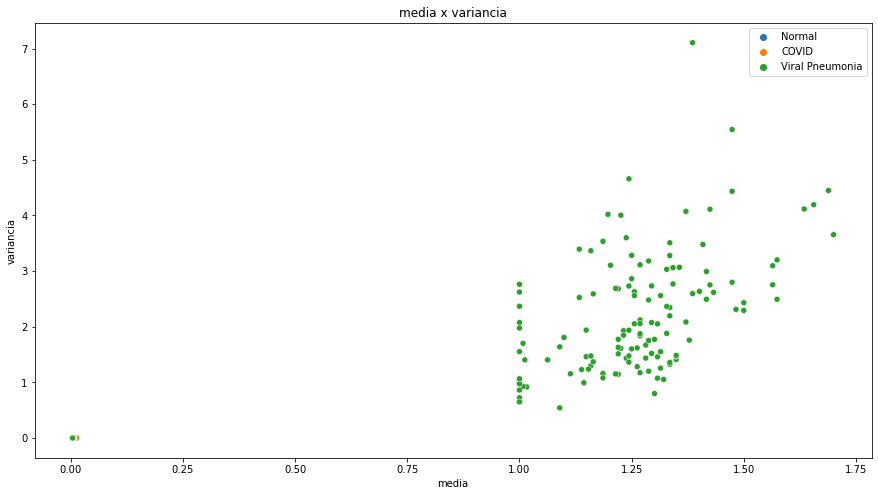

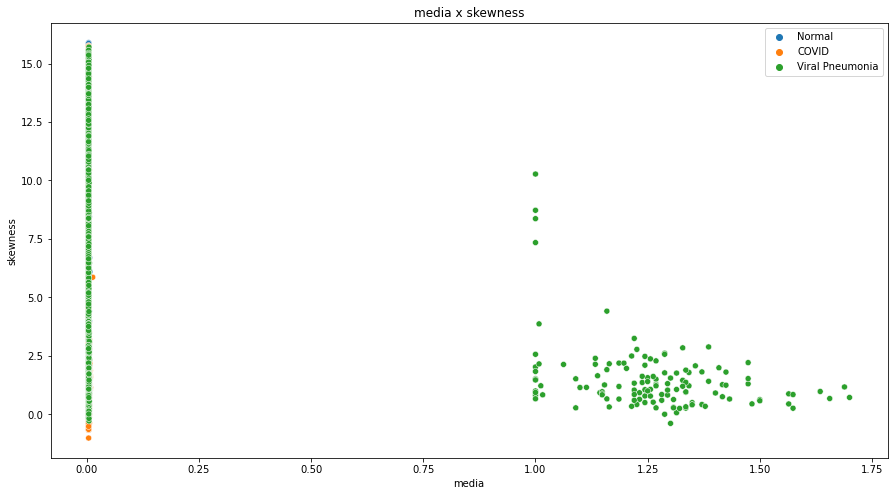

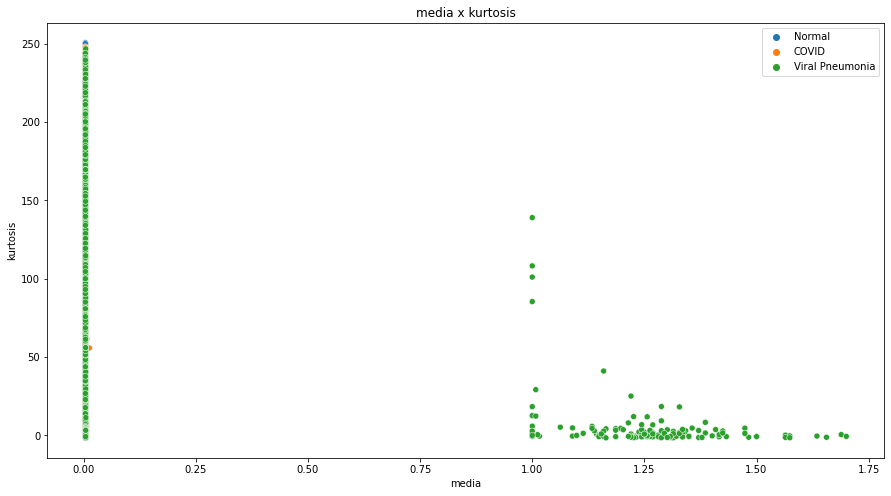

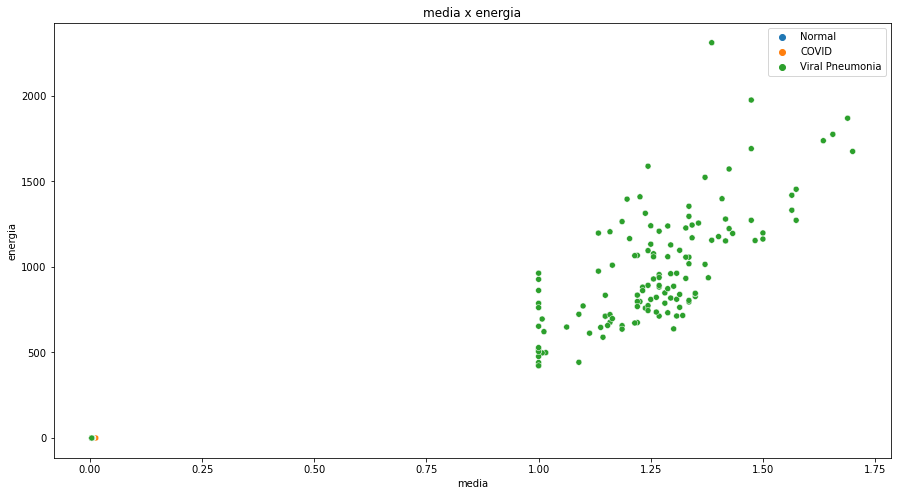

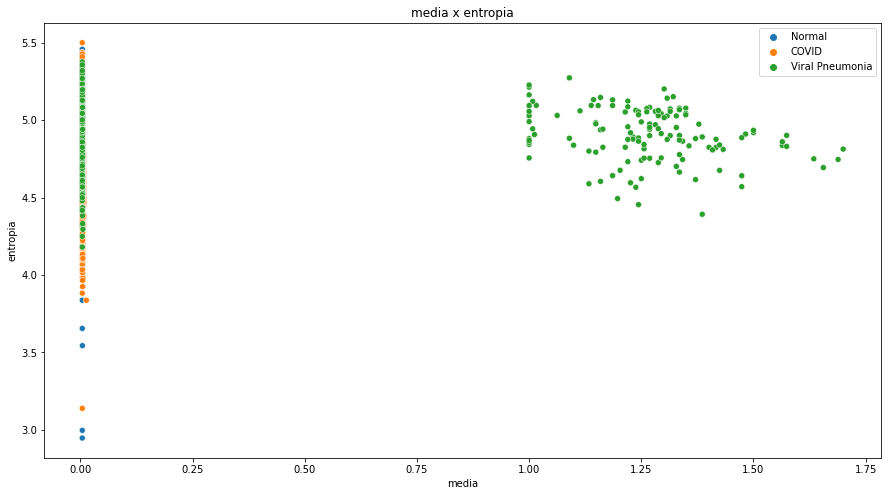

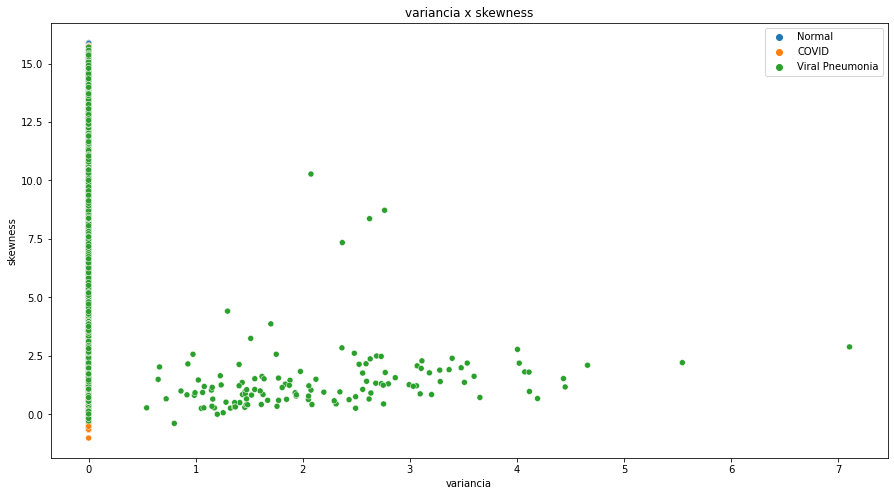

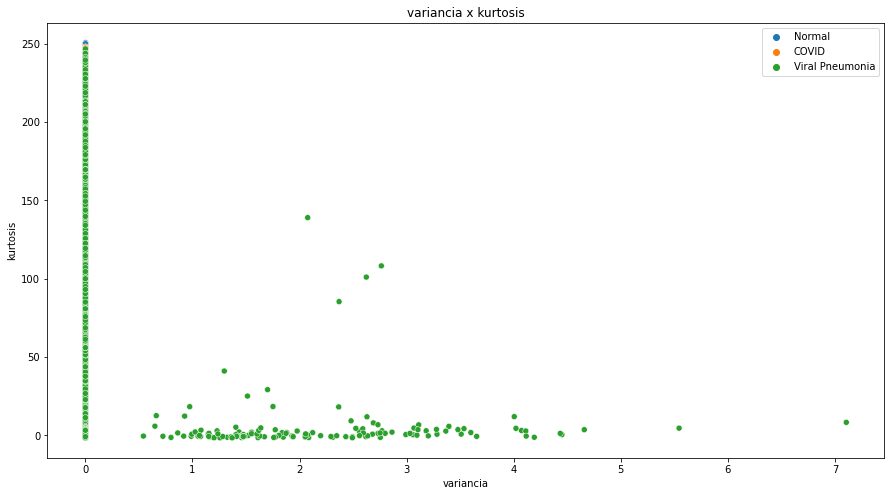

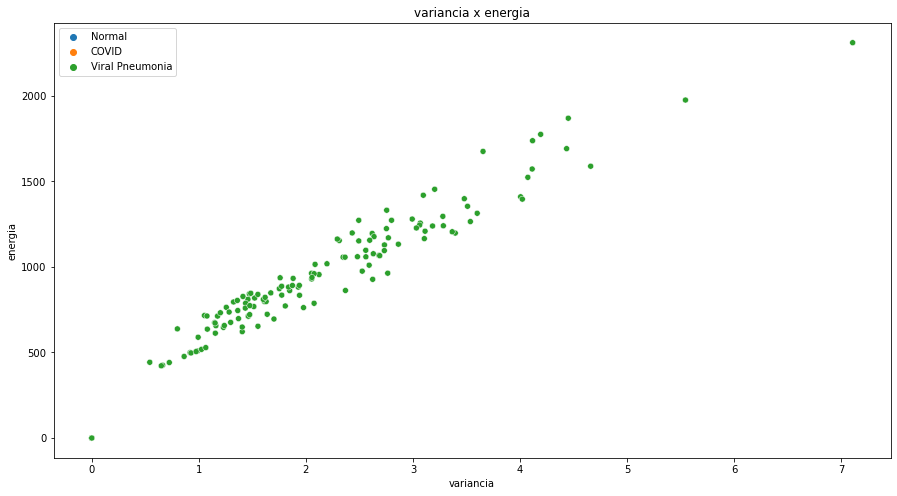

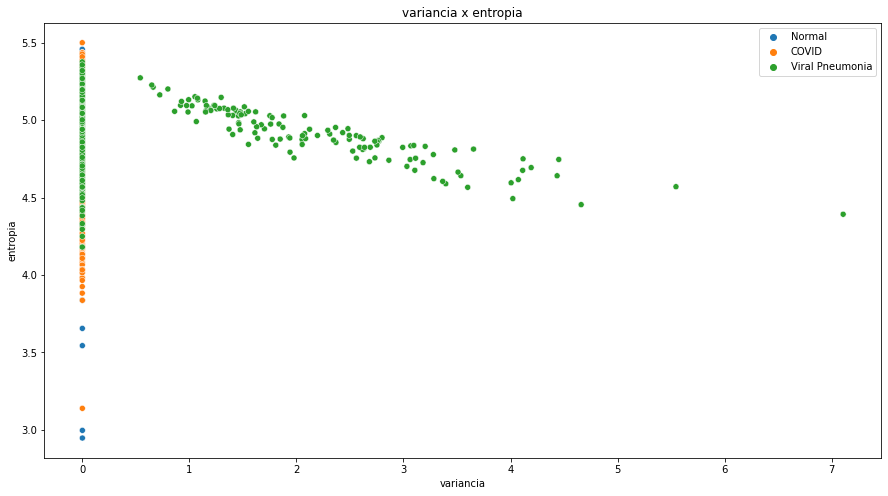

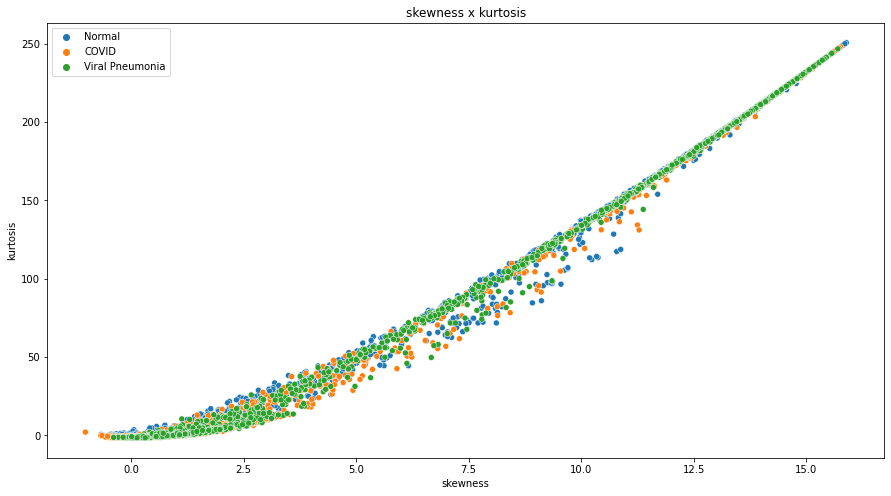

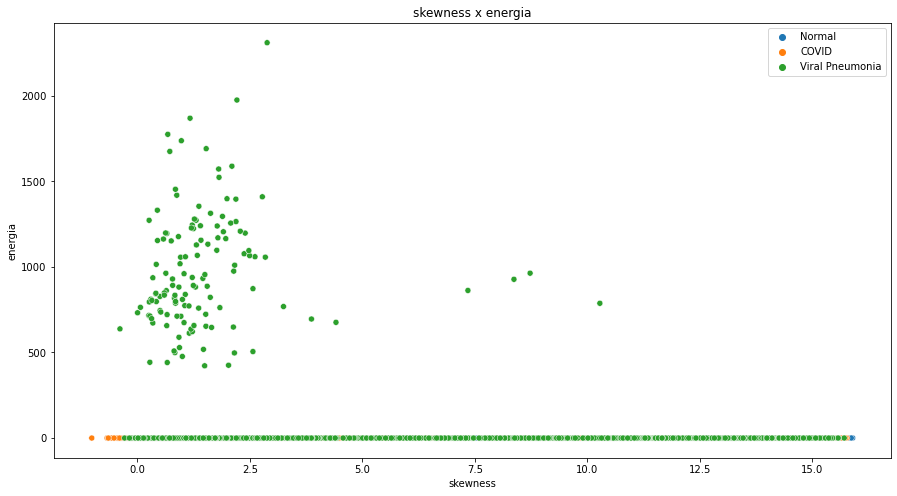

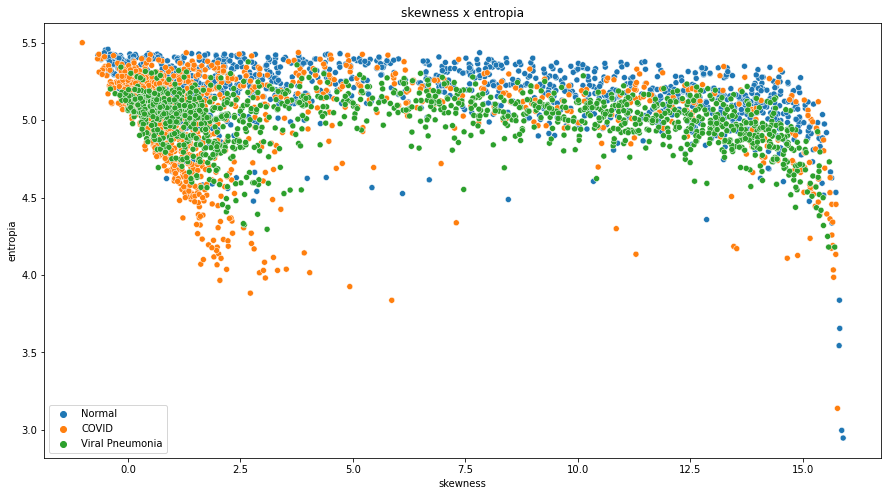

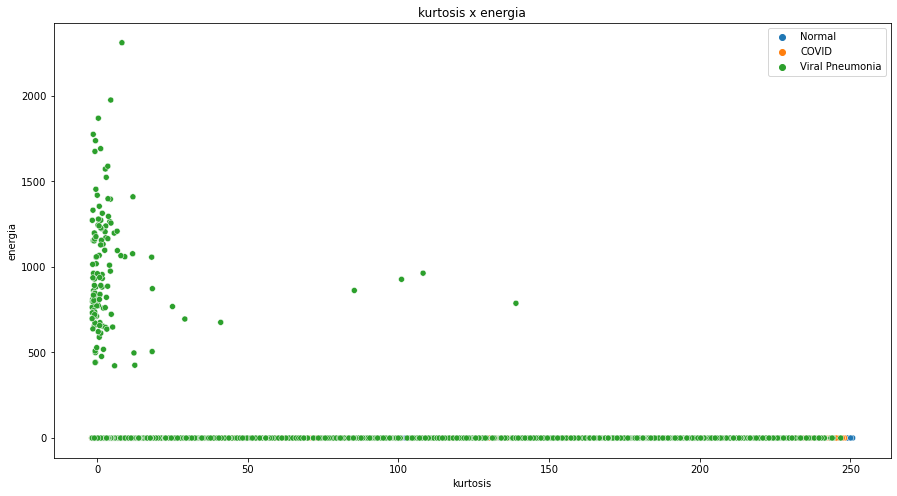

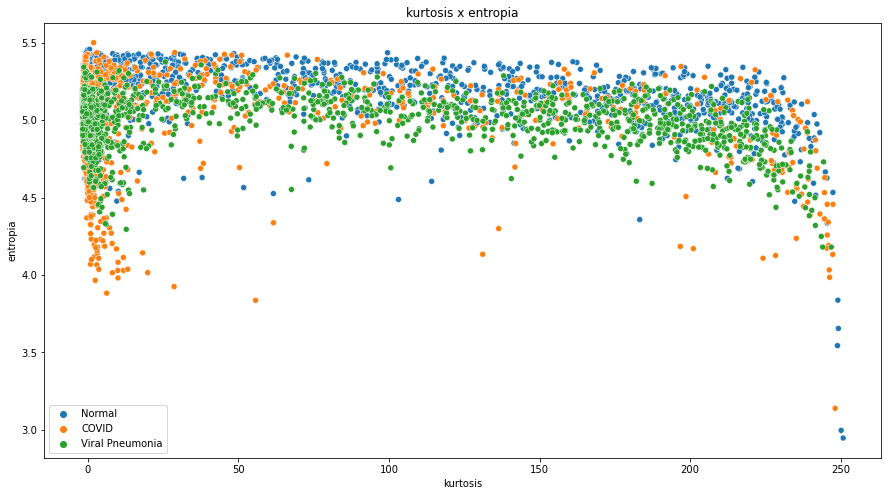

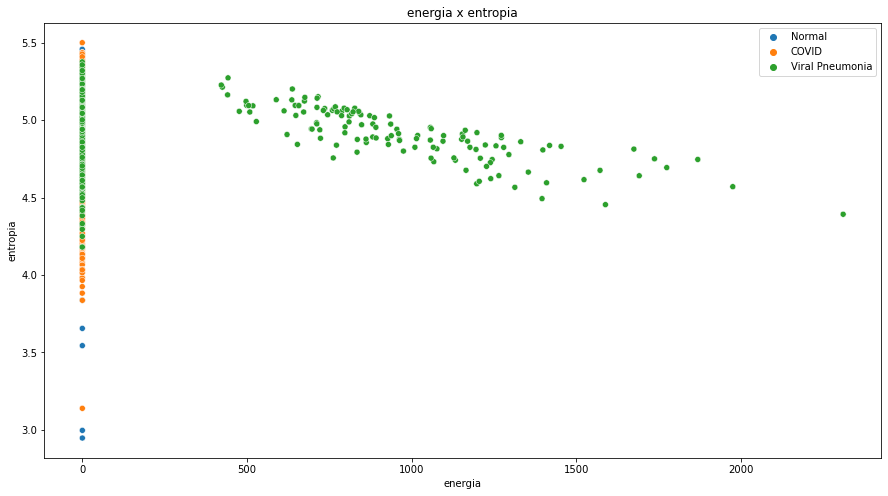

In [24]:
import seaborn as sns

index_columns = list(range(6))
index_columns_copy = index_columns.copy()
atributos = ['media', 'variancia', 'skewness', 'kurtosis', 'energia', 'entropia']

for index_i in index_columns:
  index_columns_copy.pop(0)
  for index_j in index_columns_copy:
    _, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8)) 
    sns.scatterplot(x=X[:,index_i],y=X[:,index_j],hue=y, ax=ax)
    ax.set_title(atributos[index_i] + ' x ' + atributos[index_j])
    ax.set_xlabel(atributos[index_i])
    ax.set_ylabel(atributos[index_j])
    plt.show()

## Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;

In [25]:
import pandas as pd

In [26]:
X, y = matrix_descritors(database, partial(transformacao_potencia, y=0.5))
X = np.asanyarray(X)

In [27]:
for i, classe in enumerate(y):
    if classe == 0:
        y[i] = 'Normal'
    elif classe == 1:
        y[i] = 'COVID'
    else:
        y[i] = 'Viral Pneumonia'

In [28]:
def visualize_2d(X,y,algorithm="pca",title="PCA: Multiclass Classification",figsize=(15,8)):
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    if algorithm=="tsne":
        reducer = TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=2,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    if X.shape[1]>2:
        X = reducer.fit_transform(X)
        
    else:
        if type(X)==pd.DataFrame:
        	X=X.values
    _,(ax1) = plt.subplots(nrows=1, ncols=1,figsize=figsize)
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax1);
    ax1.set_title(title);
    plt.show();

In [29]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA

# X, y = matrix_descritors(database)
# X = np.asanyarray(X)
# reducer = PCA(n_components=1,random_state=47)
# X = reducer.fit_transform(X)
# print(classification(X, y))

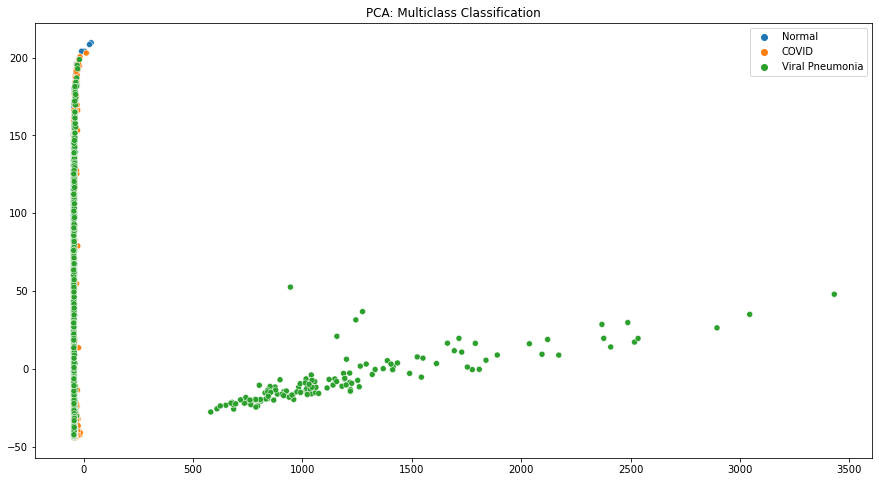

In [30]:
visualize_2d(X=X,y=y)